In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv("/content/sample_data/train.csv")

In [ ]:
le=LabelEncoder()

In [ ]:
df["Sex"]=le.fit_transform(df["Sex"])

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


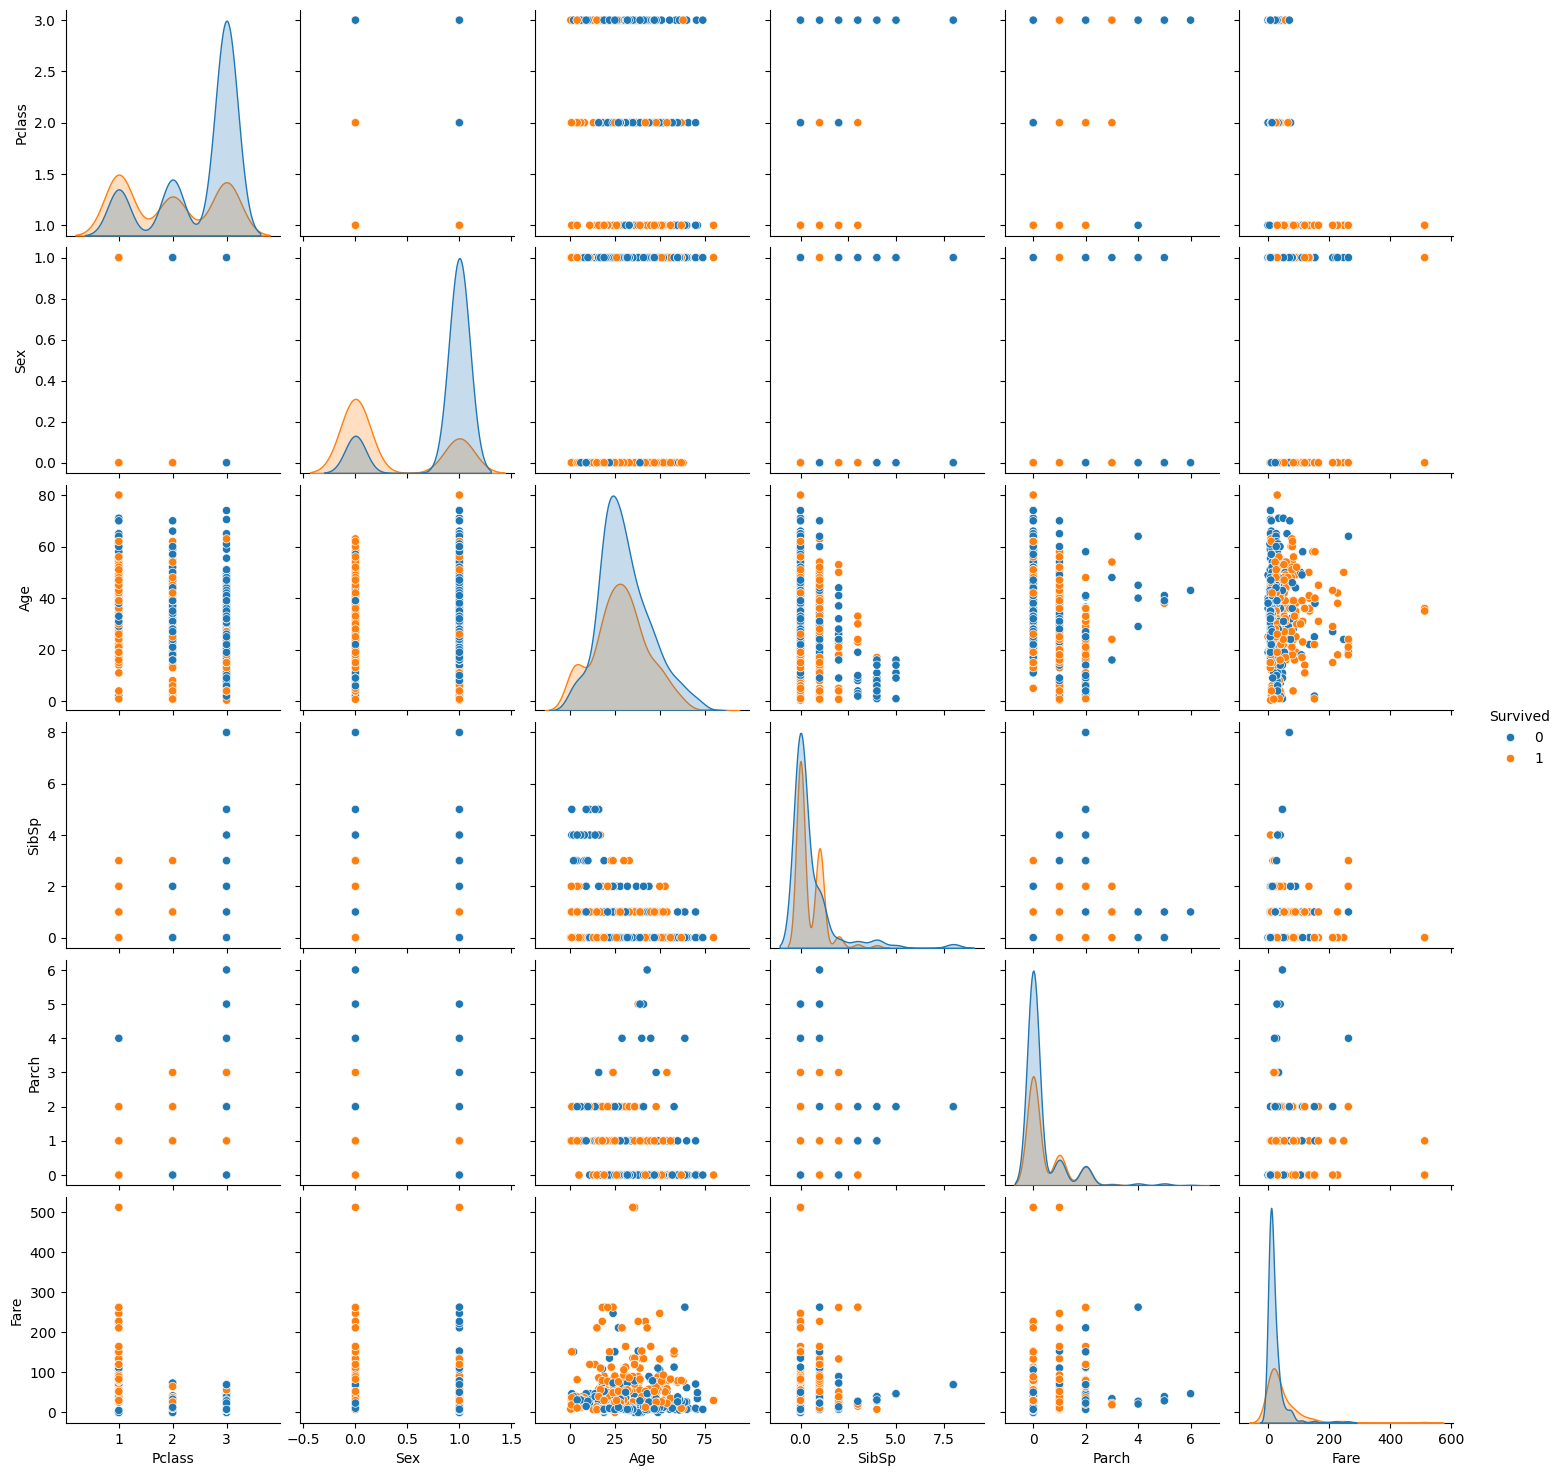

In [ ]:
sns.pairplot(df,hue="Survived")

In [ ]:
corr=df.corr()

<ipython-input-19-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [ ]:
df.index=df["PassengerId"]

In [ ]:
df.drop("PassengerId",axis=1,inplace=True)

In [ ]:
features=list(corr[abs(corr["Survived"])>0.20].index)[1:]

In [ ]:
corr[((abs(corr["Survived"]))>0.25)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000


In [ ]:
X=df[features]

In [ ]:
Y=df["Survived"]

In [ ]:
X

,Pclass,Sex,Fare
PassengerId,,,
1,3,1,7.2500
2,1,0,71.2833
3,3,0,7.9250
4,1,0,53.1000
5,3,1,8.0500
...,...,...,...
887,2,1,13.0000
888,1,0,30.0000
889,3,0,23.4500


In [ ]:
Y.shape

(891,)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=23)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
rf=RandomForestClassifier()
gb=GradientBoostingClassifier()
xg=XGBClassifier()


In [ ]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
y1_pred=rf.predict(x_test)

In [ ]:
y1_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1])

In [ ]:
print(classification_report(y1_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       150
           1       0.71      0.75      0.73        73

    accuracy                           0.82       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.82      0.82      0.82       223



In [ ]:
gb.fit(X_train,Y_train)

GradientBoostingClassifier()

In [ ]:
y2_pred=gb.predict(x_test)

In [ ]:
print(classification_report(y2_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       156
           1       0.67      0.78      0.72        67

    accuracy                           0.82       223
   macro avg       0.78      0.80      0.79       223
weighted avg       0.83      0.82      0.82       223



In [ ]:
xg.fit(X_train,Y_train)

In [ ]:
y3_pred=xg.predict(x_test)

In [ ]:
print(classification_report(y3_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       151
           1       0.68      0.74      0.71        72

    accuracy                           0.80       223
   macro avg       0.77      0.79      0.78       223
weighted avg       0.81      0.80      0.80       223



In [ ]:
df1=pd.read_csv("/content/sample_data/test.csv")

In [ ]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
p=df1['PassengerId']
p

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [ ]:
x=df1[features]

In [ ]:
df1["Sex"]=le.fit_transform(df1["Sex"])

In [ ]:
df1

In [ ]:
df1.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
np.mean(df1["Fare"])

35.627188489208635

In [ ]:
df1=df1.fillna(np.mean(df1["Fare"]))

In [ ]:
x.isna().sum()

Pclass    0
Sex       0
Fare      0
dtype: int64

In [ ]:
y=rf.predict(x)

In [ ]:
Y=pd.DataFrame({"Survived":y})

In [ ]:
Y

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
p=pd.DataFrame({"PassengerId":p})

In [ ]:
p

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
f=pd.DataFrame([p,Y])

ValueError: Must pass 2-d input. shape=(2, 418, 1)

In [ ]:
Final=pd.concat([p,Y],axis=1)

In [ ]:
Final

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# df = pd.DataFrame(data)

# # Specify the file path where you want to save the CSV file
# csv_file_path = 'output_file.csv'

# # Save the DataFrame to a CSV file
# df.to_csv(csv_file_path, index=False)

In [ ]:
csv_file_path="/content/sample_data/untitled"

In [ ]:
Final.to_csv(csv_file_path, index=False)

In [ ]:
pd.read_csv("/content/sample_data/Titanic Prediction")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
